# Thực Hành 5

In [ ]:
1. Cài đặt thư viện 

2. Viết chương trình gán nhãn ảnh

2.1.	Gán nhãn ảnh

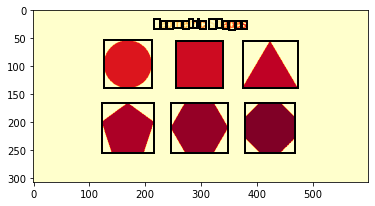

In [4]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)
# performing Otsu's thresholding
thres = threshold_otsu(a)
# pixels with intensity greater than thehold are kept
b = a > thres
# labelling is performed on b
c = label(b)
cl = Image.fromarray(c)

# Chuyển đổi sang chế độ 'L' trước khi lưu
cl = cl.convert('L') # Thêm dòng này để chuyển đổi chế độ ảnh
iio.imwrite('label_output.jpg', cl)

# on the labelled image c, regionprops is performed
properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)
# the following command creates an empty plot of
# dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, lc, ur, uc = i['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr
    # Rectangular boxes with origin at (lr,lc) are drawn
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height, fill=False,
                              edgecolor='black', linewidth=2)
    ax.add_patch(rect)

plt.show()

2.2	Dò tìm cạnh theo chiều dọc

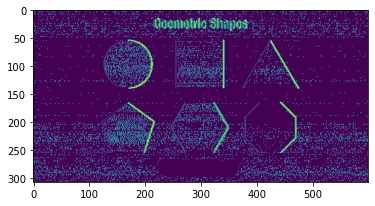

In [5]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
bmg = abs(data - nd.shift(data, (0, 1), order=0))
plt.imshow(bmg)
plt.show()

2.3.	Dò tìm cạnh với Sobel Filter

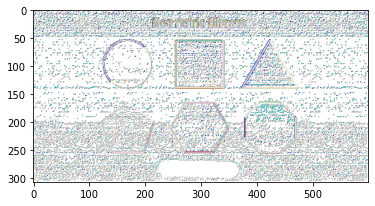

In [6]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png')
a = nd.sobel(data, axis=0)
b = nd.sobel(data, axis=1)
bmg = abs(a) + abs(b)
plt.imshow(bmg)
plt.show()

2.4.	Xác định góc của đối tượng

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


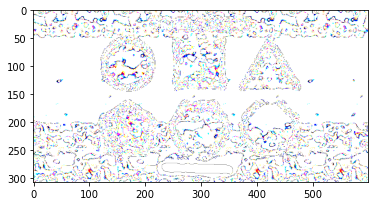

In [7]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    x1 = x ** 2
    y1 = y ** 2
    xy = abs(x * y)
    x1 = nd.gaussian_filter(x1, 3)
    y1 = nd.gaussian_filter(y1, 3)
    xy = nd.gaussian_filter(xy, 3)

    detC = x1 * y1 - 2 * xy
    trC = x1 + y1
    R = detC - alpha * trC**2
    return R

data = Image.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()

2.5.	Dò tìm hình dạng cụ thể trong ảnh với Hough Transform

2.5.1.	Dò tìm đường thẳng trong ảnh

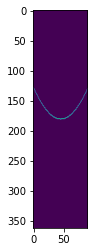

In [9]:
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt((V * V + H * H)))
    ho = np.zeros((R, 90), float)
    w = data + 0
    ok = 1
    theta = np.arange(90)/180.0 * np.pi
    tp = np.arange(90).astype(float)

    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else:
            y, h = divmod(w.argmax(), H)
            y_coord = V - y # Đổi tên biến để tránh nhầm lẫn với y ban đầu
            x_coord = h
            rh = x_coord * np.cos(theta) + y_coord * np.sin(theta)
            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            w[y,h] = 0 # Sửa lỗi ở đây, thay v bằng y
    return ho

data = np.zeros((256, 256))
data[128, 128] = 1
bmg = LineHough(data, 0.5)
plt.imshow(bmg)
plt.show()

2.5.2.	Dò tìm đường tròn trong ảnh

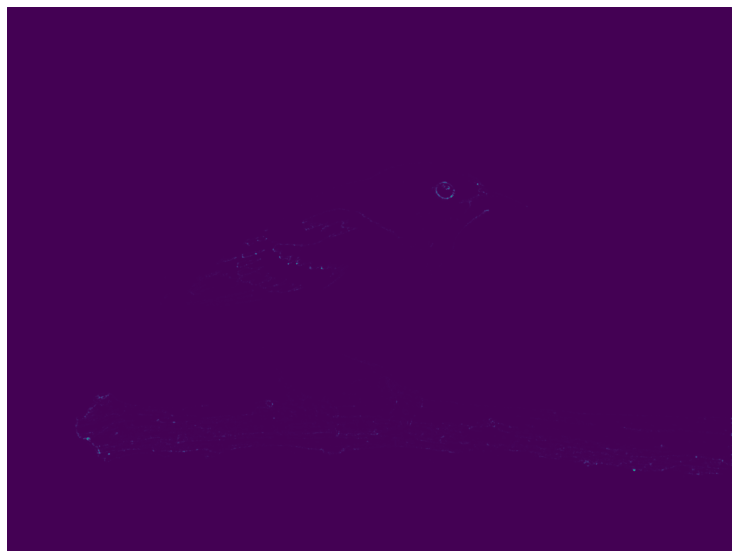

In [10]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.feature import corner_harris
from skimage.color import rgb2gray

data = iio.imread('bird.png')
image_gray = rgb2gray(data)
coordinate = corner_harris(image_gray, k = 0.001)

plt.figure(figsize=(20,10))
plt.imshow(coordinate)
plt.axis('off')
plt.show()

2.6.	Image matching

Tìm điểm cần so sánh (Harris Corner Detector)


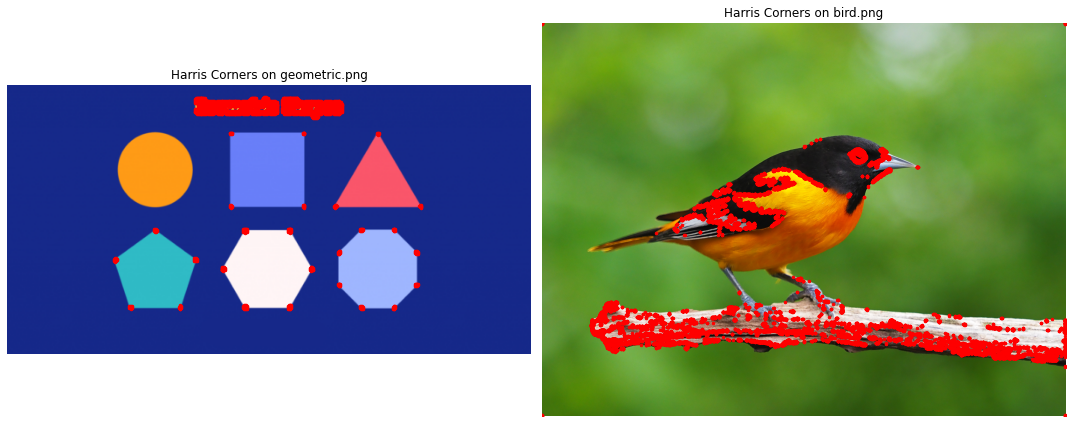

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
from skimage.feature import corner_harris
from skimage.color import rgb2gray

# Đọc ảnh (thay 'geometric.png' và 'bird.png' bằng đường dẫn thực tế của bạn)
image_geometric = iio.imread('geometric.png')
image_bird = iio.imread('bird.png')

# Chuyển đổi ảnh sang ảnh xám nếu ảnh gốc có 3 hoặc 4 kênh màu
# Harris Corner Detector hoạt động trên ảnh xám
if image_geometric.ndim == 3:
    if image_geometric.shape[2] == 4: # Nếu là RGBA, lấy 3 kênh đầu
        image_geometric = image_geometric[:, :, :3]
    image_geometric_gray = rgb2gray(image_geometric)
else:
    image_geometric_gray = image_geometric # Nếu đã là ảnh xám

if image_bird.ndim == 3:
    if image_bird.shape[2] == 4: # Nếu là RGBA, lấy 3 kênh đầu
        image_bird = image_bird[:, :, :3]
    image_bird_gray = rgb2gray(image_bird)
else:
    image_bird_gray = image_bird # Nếu đã là ảnh xám

# Áp dụng Harris Corner Detector
# Tham số k thường nằm trong khoảng 0.04 - 0.06
harris_response_geometric = corner_harris(image_geometric_gray, k=0.001) # Sử dụng k=0.001 như bạn đã cung cấp
harris_response_bird = corner_harris(image_bird_gray, k=0.001)

# Ngưỡng hóa kết quả để có được tọa độ các điểm góc mạnh
# Chọn các điểm có giá trị đáp ứng Harris lớn hơn một phần trăm giá trị cực đại
threshold_geometric = 0.01 * harris_response_geometric.max()
threshold_bird = 0.01 * harris_response_bird.max()

# Lấy tọa độ (hàng, cột) của các điểm góc
corner_coords_geometric = np.argwhere(harris_response_geometric > threshold_geometric)
corner_coords_bird = np.argwhere(harris_response_bird > threshold_bird)

# Hiển thị ảnh và các điểm góc tìm được (tùy chọn)
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(image_geometric)
axes[0].plot(corner_coords_geometric[:, 1], corner_coords_geometric[:, 0], 'r.', markersize=5)
axes[0].set_title('Harris Corners on geometric.png')
axes[0].axis('off')

axes[1].imshow(image_bird)
axes[1].plot(corner_coords_bird[:, 1], corner_coords_bird[:, 0], 'r.', markersize=5)
axes[1].set_title('Harris Corners on bird.png')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Lúc này, `corner_coords_geometric` và `corner_coords_bird` chứa tọa độ các điểm góc đã tìm thấy.

Xem xét vùng chọn hình chữ nhật xung quanh những điểm cần so sánh

Tổng số điểm góc từ geometric.png: 2923
Tổng số vùng ảnh (patches) được trích xuất từ geometric.png: 2923
Tổng số điểm góc từ bird.png: 20147
Tổng số vùng ảnh (patches) được trích xuất từ bird.png: 20147


<ipython-input-18-116e2f6e7b26>:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


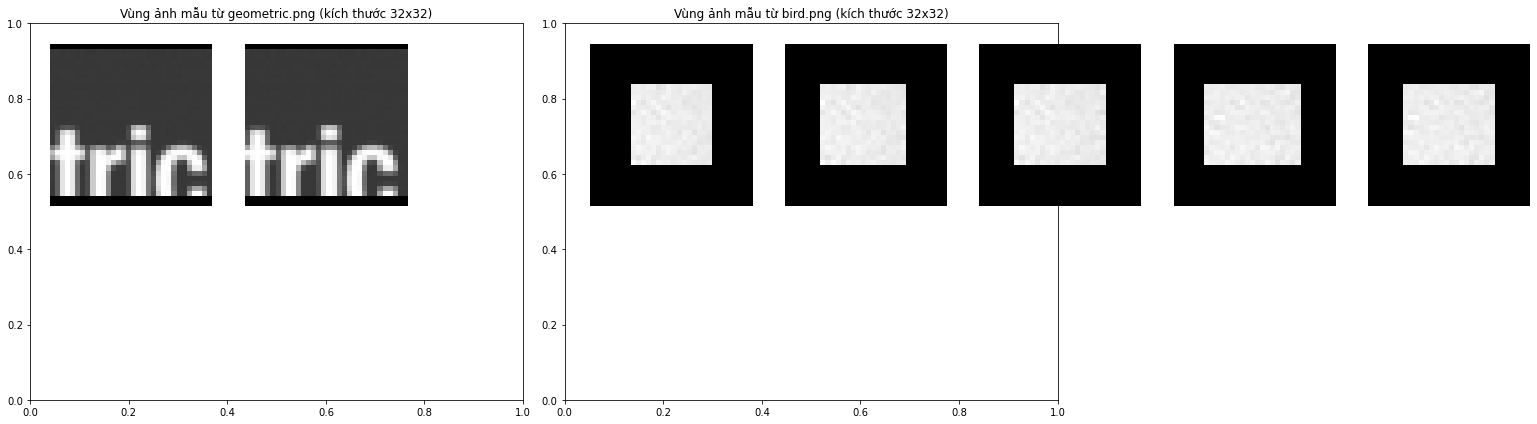

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
from skimage.feature import corner_harris
from skimage.color import rgb2gray

def get_patch(image, center_row, center_col, patch_size=32):
    half_patch = patch_size // 2

    min_row = max(0, center_row - half_patch)
    max_row = min(image.shape[0], center_row + half_patch)
    min_col = max(0, center_col - half_patch)
    max_col = min(image.shape[1], center_col + half_patch)

    patch = image[min_row:max_row, min_col:max_col]

    # Đảm bảo vùng ảnh có kích thước mong muốn bằng cách đệm nếu cần
    padded_patch = np.zeros((patch_size, patch_size), dtype=image.dtype)
    p_rows, p_cols = patch.shape
    
    start_row = (patch_size - p_rows) // 2
    start_col = (patch_size - p_cols) // 2

    padded_patch[start_row : start_row + p_rows, start_col : start_col + p_cols] = patch

    return padded_patch

# --- Phần đọc ảnh, chuyển grayscale và tìm Harris Corners ---
# Đọc ảnh
image_geometric = iio.imread('geometric.png')
image_bird = iio.imread('bird.png')

# Xử lý ảnh 4 kênh (RGBA) nếu có và chuyển về grayscale
if image_geometric.ndim == 3:
    if image_geometric.shape[2] == 4:
        image_geometric = image_geometric[:, :, :3]
    image_geometric_gray = rgb2gray(image_geometric)
else:
    image_geometric_gray = image_geometric

if image_bird.ndim == 3:
    if image_bird.shape[2] == 4:
        image_bird = image_bird[:, :, :3]
    image_bird_gray = rgb2gray(image_bird)
else:
    image_bird_gray = image_bird

# Tìm điểm Harris Corner
harris_response_geometric = corner_harris(image_geometric_gray, k=0.001)
harris_response_bird = corner_harris(image_bird_gray, k=0.001)

# Ngưỡng để lấy tọa độ điểm góc
threshold_geometric = 0.01 * harris_response_geometric.max()
threshold_bird = 0.01 * harris_response_bird.max()

corner_coords_geometric = np.argwhere(harris_response_geometric > threshold_geometric)
corner_coords_bird = np.argwhere(harris_response_bird > threshold_bird)

# --- Phần chính: Xem xét vùng chọn hình chữ nhật xung quanh các điểm ---
patch_size = 32 # Kích thước vùng ảnh (ví dụ: 32x32 pixel)

# Trích xuất các vùng ảnh (patches) từ geometric.png
patches_geometric = []
for r, c in corner_coords_geometric:
    patches_geometric.append(get_patch(image_geometric_gray, r, c, patch_size))

# Trích xuất các vùng ảnh (patches) từ bird.png
patches_bird = []
for r, c in corner_coords_bird:
    patches_bird.append(get_patch(image_bird_gray, r, c, patch_size))

print(f"Tổng số điểm góc từ geometric.png: {len(corner_coords_geometric)}")
print(f"Tổng số vùng ảnh (patches) được trích xuất từ geometric.png: {len(patches_geometric)}")
print(f"Tổng số điểm góc từ bird.png: {len(corner_coords_bird)}")
print(f"Tổng số vùng ảnh (patches) được trích xuất từ bird.png: {len(patches_bird)}")

# Hiển thị một số vùng ảnh mẫu để trực quan hóa
plt.figure(figsize=(15, 6))

# Hiển thị từ geometric.png
if patches_geometric:
    plt.subplot(1, 2, 1)
    plt.title(f"Vùng ảnh mẫu từ geometric.png (kích thước {patch_size}x{patch_size})")
    # Lấy tối đa 5 vùng hoặc ít hơn nếu không đủ
    num_display = min(5, len(patches_geometric))
    for i in range(num_display):
        # Tạo subplot nhỏ trong subplot lớn
        ax = plt.axes([0.05 + i * 0.18, 0.5, 0.15, 0.4]) # [left, bottom, width, height]
        ax.imshow(patches_geometric[i], cmap='gray')
        ax.axis('off')
else:
    plt.subplot(1, 2, 1)
    plt.title("Không có vùng ảnh nào từ geometric.png để hiển thị")
    plt.axis('off')

# Hiển thị từ bird.png
if patches_bird:
    plt.subplot(1, 2, 2)
    plt.title(f"Vùng ảnh mẫu từ bird.png (kích thước {patch_size}x{patch_size})")
    num_display = min(5, len(patches_bird))
    for i in range(num_display):
        ax = plt.axes([0.55 + i * 0.18, 0.5, 0.15, 0.4]) # [left, bottom, width, height]
        ax.imshow(patches_bird[i], cmap='gray')
        ax.axis('off')
else:
    plt.subplot(1, 2, 2)
    plt.title("Không có vùng ảnh nào từ bird.png để hiển thị")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Bây giờ, các danh sách `patches_geometric` và `patches_bird` chứa các vùng ảnh
# đã được trích xuất, sẵn sàng cho bước "Tính mô tả đặc trưng cục bộ".

Tính mô tả đặc trưng cục bộ cho mỗi điểm của mỗi ảnh

In [19]:
import cv2
import numpy as np
import imageio.v2 as iio
from skimage.color import rgb2gray

# Đọc ảnh (Đảm bảo các file này có sẵn trong thư mục của bạn)
image_geometric = iio.imread('geometric.png')
image_bird = iio.imread('bird.png')

# Xử lý ảnh 4 kênh (RGBA) nếu có và chuyển về dạng phù hợp cho OpenCV
if image_geometric.ndim == 3 and image_geometric.shape[2] == 4:
    image_geometric_processed = image_geometric[:, :, :3] # Lấy 3 kênh RGB
else:
    image_geometric_processed = image_geometric

if image_bird.ndim == 3 and image_bird.shape[2] == 4:
    image_bird_processed = image_bird[:, :, :3] # Lấy 3 kênh RGB
else:
    image_bird_processed = image_bird

# Khởi tạo bộ mô tả ORB
orb = cv2.ORB_create()

# Tìm keypoints và descriptors cho ảnh geometric.png
# ORB.detectAndCompute() tự động xử lý ảnh màu hoặc ảnh xám
keypoints_geometric, descriptors_geometric = orb.detectAndCompute(image_geometric_processed, None)

# Tìm keypoints và descriptors cho ảnh bird.png
keypoints_bird, descriptors_bird = orb.detectAndCompute(image_bird_processed, None)

# In số lượng keypoints và kích thước của descriptors để kiểm tra
print(f"Số lượng keypoints trong geometric.png: {len(keypoints_geometric)}")
if descriptors_geometric is not None:
    print(f"Kích thước descriptors của geometric.png: {descriptors_geometric.shape}")
else:
    print("Không tìm thấy descriptors cho geometric.png")

print(f"\nSố lượng keypoints trong bird.png: {len(keypoints_bird)}")
if descriptors_bird is not None:
    print(f"Kích thước descriptors của bird.png: {descriptors_bird.shape}")
else:
    print("Không tìm thấy descriptors cho bird.png")

# Lúc này, `keypoints_geometric`, `descriptors_geometric`, `keypoints_bird`, `descriptors_bird`
# chứa các điểm đặc trưng và mô tả cục bộ tương ứng của mỗi ảnh, sẵn sàng cho bước so khớp.

Số lượng keypoints trong geometric.png: 180
Kích thước descriptors của geometric.png: (180, 32)

Số lượng keypoints trong bird.png: 500
Kích thước descriptors của bird.png: (500, 32)


Kiểm tra độ tương đồng giữa hai ảnh

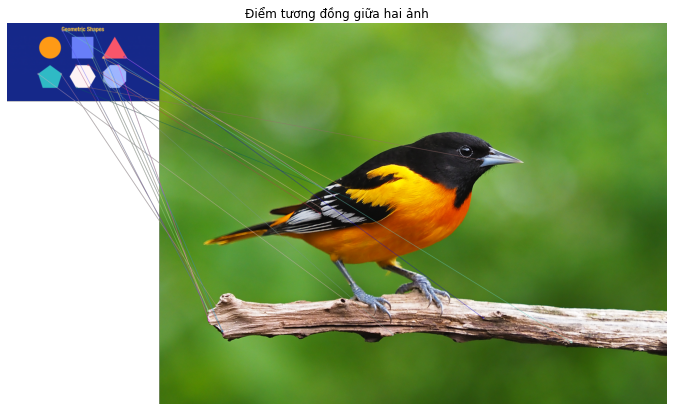

In [20]:
import cv2
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh gốc (đảm bảo ảnh có 3 kênh màu RGB hoặc là ảnh grayscale)
# Nếu ảnh là RGBA (4 kênh), cần loại bỏ kênh alpha
image_geometric = iio.imread('geometric.png')
image_bird = iio.imread('bird.png')

# Xử lý ảnh 4 kênh (RGBA) nếu có để chuyển về 3 kênh (RGB) hoặc grayscale
if image_geometric.ndim == 3 and image_geometric.shape[2] == 4:
    image_geometric_processed = image_geometric[:, :, :3]
else:
    image_geometric_processed = image_geometric

if image_bird.ndim == 3 and image_bird.shape[2] == 4:
    image_bird_processed = image_bird[:, :, :3]
else:
    image_bird_processed = image_bird

# Khởi tạo bộ mô tả ORB
orb = cv2.ORB_create()

# Tìm keypoints và descriptors cho ảnh đầu tiên
keypoints1, descriptors1 = orb.detectAndCompute(image_geometric_processed, None)

# Tìm keypoints và descriptors cho ảnh thứ hai
keypoints2, descriptors2 = orb.detectAndCompute(image_bird_processed, None)

# Kiểm tra xem có descriptors hợp lệ không trước khi so khớp
if descriptors1 is None or descriptors2 is None:
    print("Không tìm thấy đủ điểm đặc trưng trong một hoặc cả hai ảnh để thực hiện so khớp.")
else:
    # Khởi tạo bộ so khớp Brute-Force (BFMatcher)
    # NORM_HAMMING được sử dụng cho các descriptors nhị phân như ORB
    # crossCheck=True chỉ giữ lại các so khớp tốt nhất theo cả hai chiều
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # So khớp các descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sắp xếp các so khớp theo khoảng cách (khoảng cách nhỏ hơn -> tương đồng cao hơn)
    matches = sorted(matches, key = lambda x:x.distance)

    # Vẽ các so khớp tốt nhất
    # Chỉ vẽ 50 so khớp tốt nhất để dễ nhìn
    img_matches = cv2.drawMatches(image_geometric, keypoints1, image_bird, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Hiển thị kết quả
    plt.figure(figsize=(15, 7))
    plt.imshow(img_matches)
    plt.title("Điểm tương đồng giữa hai ảnh")
    plt.axis('off')
    plt.show()